In [1]:
"""
The date - "Date"
The opening price of the stock - "Open"
The high price of that day - "High"
The low price of that day - "Low"
The closed price of that day - "Close"
The amount of stocks traded during that day - "Volume"
The stock's closing price that has been amended to include any distributions/corporate actions that occurs before next days open - "Adj[usted] Close"
"""

'\nThe date - "Date"\nThe opening price of the stock - "Open"\nThe high price of that day - "High"\nThe low price of that day - "Low"\nThe closed price of that day - "Close"\nThe amount of stocks traded during that day - "Volume"\nThe stock\'s closing price that has been amended to include any distributions/corporate actions that occurs before next days open - "Adj[usted] Close"\n'

In [2]:
"""
IMPORTANT LIBRARIES

Pandas - loads data in 2D array format & performs analysis
Numpy - Used for computation, are faster than normal python arrays
Matplotlib/Seaborn - visualization library , we can as well use pyplot
Sklearn - Model development & evaluation, had pre-implemented functions
XGBoost - contains the eXtreme Gradient Boosting ML algo, that helps in achieving high accuracy in prediction
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [3]:
# Import Data
df = pd.read_csv('./data/TSLA.csv')


print(df.head())  # Note: Some data is missing, because on weekends & holidays, stock market is closed
print('*' * 100)
print(df.tail())

         Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900
****************************************************************************************************
            Date        Open        High         Low       Close   Adj Close  \
2411  2020-01-28  568.489990  576.809998  558.080017  566.900024  566.900024   
2412  2020-01-29  575.690002  589.799988  567.429993  580.989990  580.989990   
2413  2020-01-30  632.419983  650.880005  618.000000  640.809998  640.809998   
2414  2020-01-31  640.000000  653.000000  632.520020  650.570007  650.570007   
2415  2020-02-03  673.690002  786.140015  673.520

In [4]:
print(f'****************** Information on Data Rows & Columns: *************')
rows_and_columns = df.shape
print(rows_and_columns)


****************** Information on Data Rows & Columns: *************
(2416, 7)


In [5]:
print(f'****************** More Information on data: *************')
# Data types of all columns

more_data_info = df.describe()
print(more_data_info)
print(df.info())

****************** More Information on data: *************
              Open         High          Low        Close    Adj Close  \
count  2416.000000  2416.000000  2416.000000  2416.000000  2416.000000   
mean    186.271147   189.578224   182.916639   186.403651   186.403651   
std     118.740163   120.892329   116.857591   119.136020   119.136020   
min      16.139999    16.629999    14.980000    15.800000    15.800000   
25%      34.342498    34.897501    33.587501    34.400002    34.400002   
50%     213.035004   216.745002   208.870002   212.960007   212.960007   
75%     266.450012   270.927513   262.102501   266.774994   266.774994   
max     673.690002   786.140015   673.520020   780.000000   780.000000   

             Volume  
count  2.416000e+03  
mean   5.572722e+06  
std    4.987809e+06  
min    1.185000e+05  
25%    1.899275e+06  
50%    4.578400e+06  
75%    7.361150e+06  
max    4.706500e+07  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Da

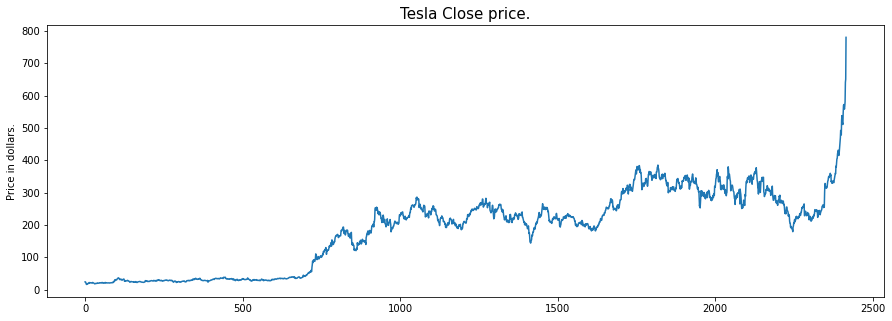

****************** Null values in the data frame *************


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:


# EXPLANATORY DATA ANALYSIS(EDA)
"""
EDA - An approach of analyzing data using visual techniques. Used to discover trends & patterns, with the help of
statistical summaries and graphical representation.
"""
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


print(f'****************** Null values in the data frame *************')
df.isnull().sum()


    

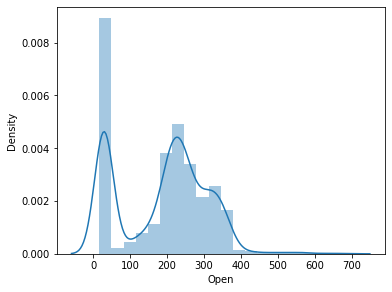

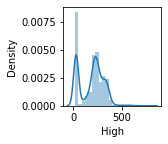

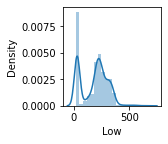

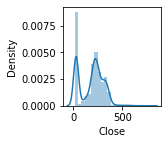

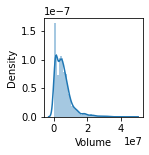

In [7]:
# Distribution plot for continuous variable
features = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
    plt.show()


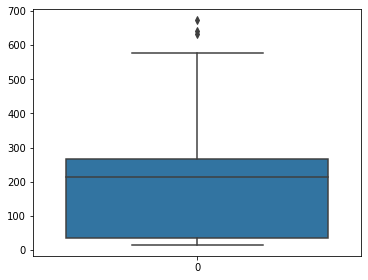

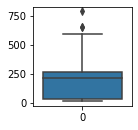

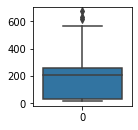

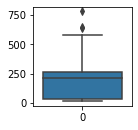

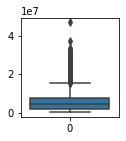

In [8]:

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
    plt.show()

In [9]:
# From the boxplots, we can conclude that only volume data contains outliers in it, but data in the rest of the columns are free from any

In [10]:

# splitted = df['Date'].str.split('/', expand=True)
# print(splitted)
# df['day'] = splitted[1].astype('int')
# df['month'] = splitted[1].astype('int')
# df['year'] = splitted[2].astype('int')

# df.head()

# Date is a categorical data.It is not a float. We will not use it to train the model
df = df.drop(['Date'],axis=1)


In [11]:
# Feature Engineering

# Target Variable
y = df["Close"]

# Features
x = df.drop(["Close","Adj Close"],axis=1)

In [12]:
# Spliting the data in 80%, 20% for training and testing
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.2)
# test whether we have 80% train and 20% test data
print(f'percente:{len(xTrain)/(len(xTrain)+len(xTest)) * 100}')

percente:79.96688741721854.round()


In [13]:
# Model Development using, Linear Regression, Support Vector Machine, XGBClassifier
# LinearRegression
model = LinearRegression()

# Fiting the training data in the model
model.fit(xTrain,yTrain)

LinearRegression()

LinearRegression()

In [14]:
# check the accuracy of the model using sklearn score
model.score(xTest,yTest)

0.9996763444711563

In [15]:
# Getting the intercept and Coefficients
print("Intercept: ",model.intercept_)
print("Coefficients: ")
for _ in model.coef_:
    print(_)

Intercept:  -0.09041696862558979
Coefficients: 
-0.6630684078871819
0.924924696527694
0.736909375323097
-2.615403771333291e-08


In [16]:
# Making predictions using the predict() and xTest data
predictions = model.predict(xTest)

In [17]:
comparison = pd.DataFrame({'Predicted Values':predictions,'Actual Values':yTest})

In [18]:
print(comparison.head(15))

      Predicted Values  Actual Values
1545        223.250938     223.240005
241          28.509297      28.430000
1056        280.329269     278.480011
2203        287.067175     289.179993
1890        311.259163     311.350006
2302        219.311093     220.830002
1908        338.914933     342.850006
1760        376.175450     377.489990
168          23.748901      23.889999
293          23.017538      23.110001
8            17.190749      17.049999
1614        193.622309     193.139999
930         240.379912     234.410004
2356        322.795539     326.579987
100          29.291873      29.889999


In [19]:
# Visualizing the data to inspect the relationship between the target and features showing the best line fit using seaborn

<AxesSubplot:xlabel='Volume', ylabel='Close'>

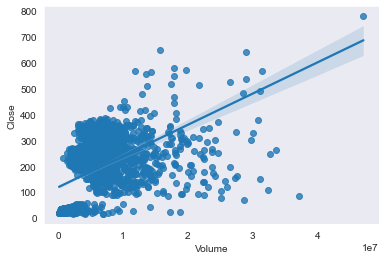

In [20]:
# Closing price vs the Volume
sb.set_style("dark")
sb.regplot(x=x['Volume'], y=y)


<AxesSubplot:xlabel='Open', ylabel='Close'>

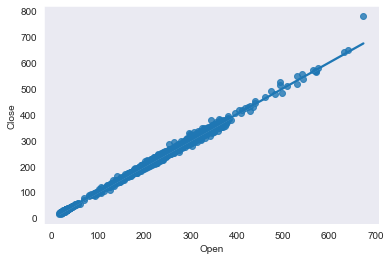

In [21]:
# Closing price vs Opening price
sb.regplot(y=y,x=x["Open"])

<AxesSubplot:xlabel='High', ylabel='Close'>

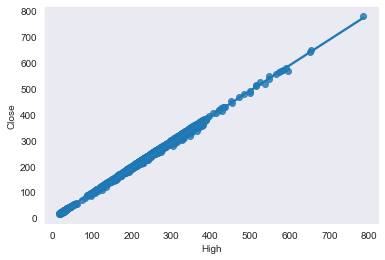

In [22]:
# Closing price vs High price
sb.regplot(y=y,x=x["High"])

<AxesSubplot:xlabel='Low', ylabel='Close'>

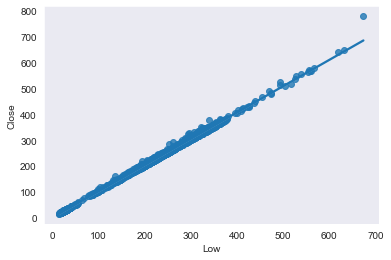

In [23]:
# Closing price vs Low price
sb.regplot(y=y,x=x["Low"])